ABLONE AGE  PREDICTION USING ML

# New Section

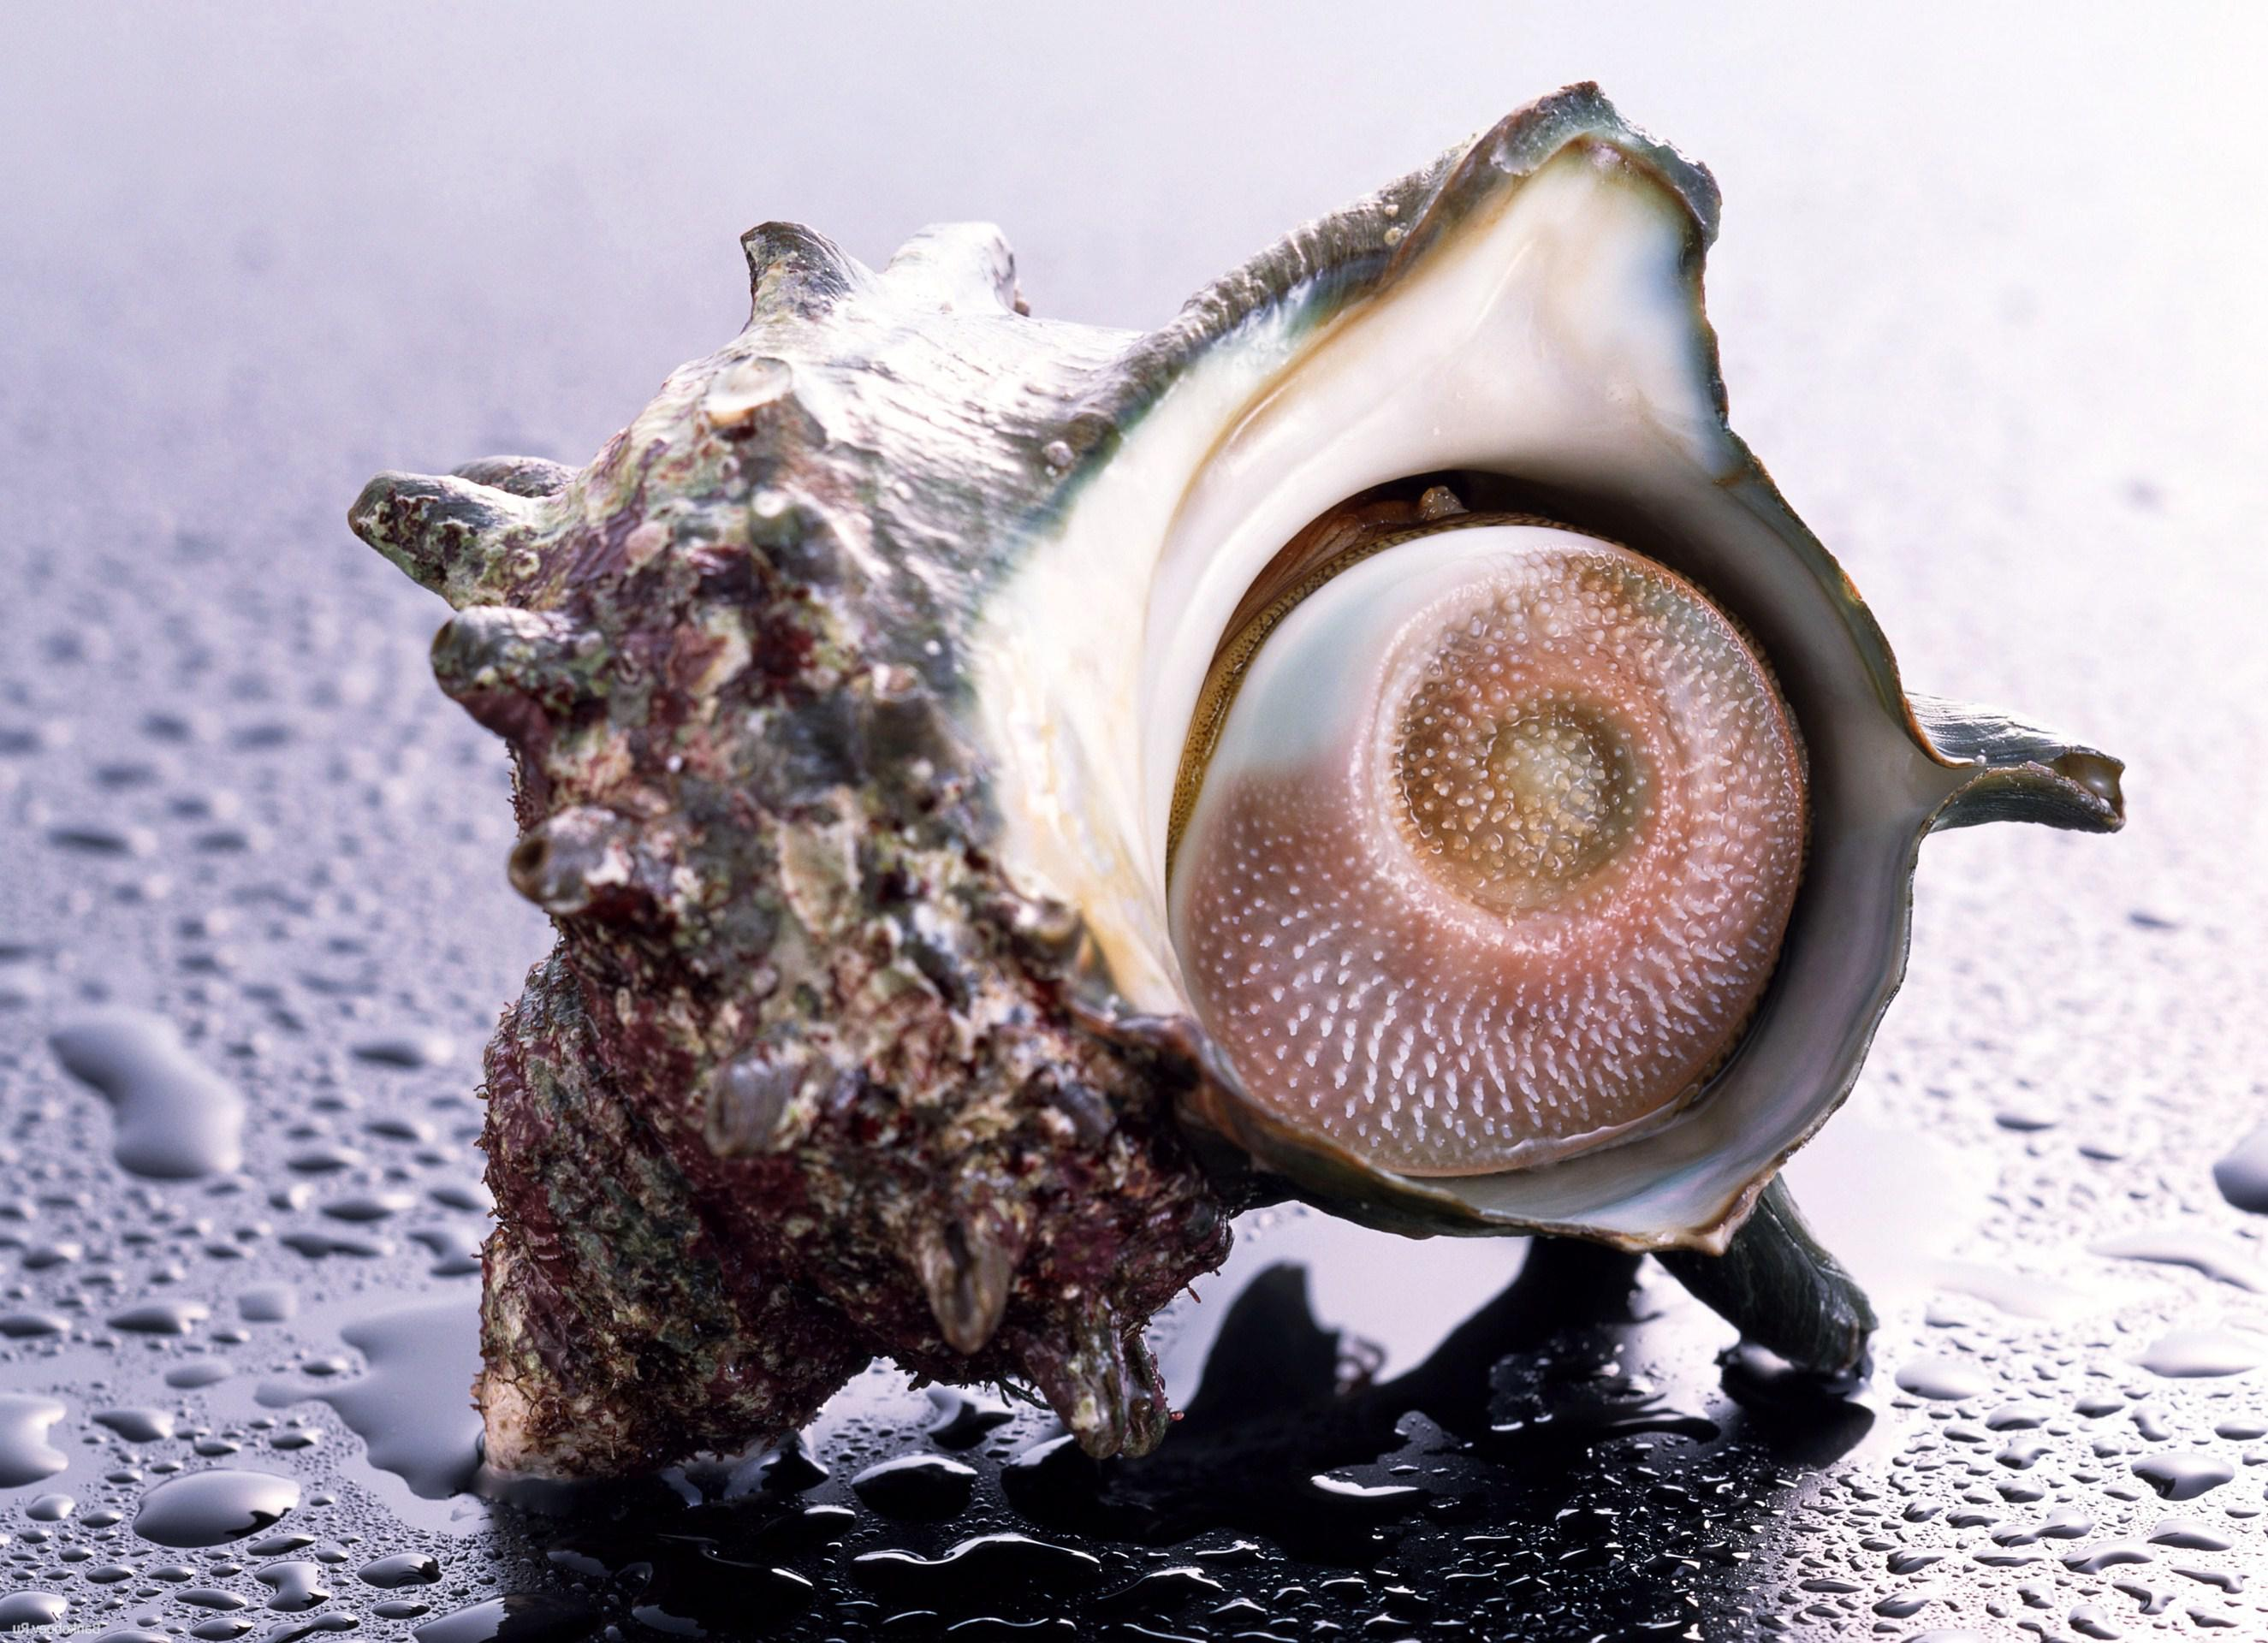

## Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


### Loading some neccessary libs here

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')

#### Loading the Ablone Dataset  here 

In [2]:
ablone_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
ablone_data.head(10)
# so now  we  have  loaded  the  data  for  the  further analysis 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
ablone_data['Rings'].value_counts().sum()

4177

In [4]:
ablone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
ablone_data.columns.value_counts().sum()
# so total  we  have 9 columns  where  8  are  independent  cols  or features  while Rings  col as  the  dependent  col

9

### About  the *columns*

1. Sex : It talks  about  being male  or  female of  the Ablone.
2 . Length: It talks  about  the  overall  length  of the Ablone.
3. Diameter: - It is  the  crucial  measurement  of  the circles as it standard 
  method   for  the measurement .
4. Height: tells  simply  about the  total height of  the  Ablone..
5. Whole_weight : it tells about the actual weight  of  the Ablone.
6. Shucked_weight : it is the  weight  of the  body of  the ablone inside th shell.
7. viscera_weight : it is  the gut  weight of  the ablone after  bleeding.
8. Shell_weight: this  is  the  weight of  the empty  dry hard cell .
9. Rings: This  tells  us about  our  age  of  the Ablone and is also our 
label data
            

### Searching  for all the NA-values

In [6]:
ablone_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

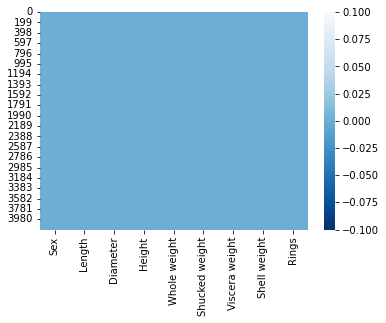

In [7]:
sns.heatmap(ablone_data.isnull(), cmap='Blues_r')

Checking  for Categoriacal values and  encoding  them

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
ablone_data['Sex'] = lbl.fit_transform(ablone_data['Sex'])

In [9]:
ablone_data['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

so we  can see  that  the  data has  no na Values  till now 

### Exploration of the Data(EDA)
##### doing  Univariate & bivariate & Multivaraite   analysis  on the  data


Text(0.5, 1.0, 'sex_counts')

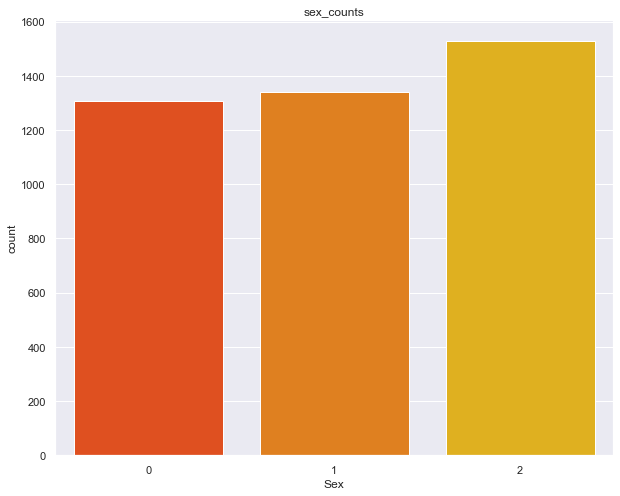

In [10]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=ablone_data, x ='Sex', palette='autumn')
plt.title('sex_counts')

so  we  can see  that  here we  have more  of  Male and less  of female and  female  and  the other sex is  almost  same as  female 

In [11]:
ablone_data.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Length effect on rings')

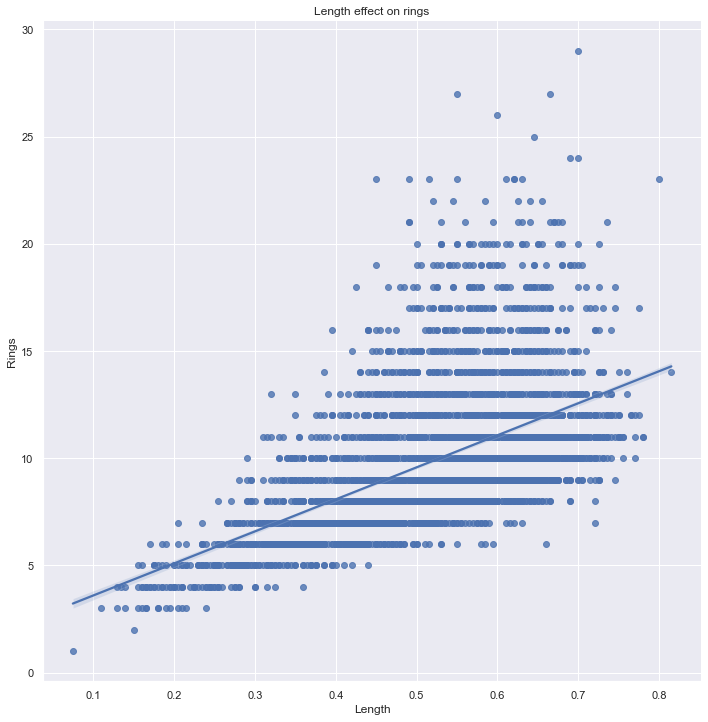

In [12]:
sns.lmplot(data=ablone_data, x ='Length', y ='Rings', palette ='Blues_r', height =10, aspect=1)
plt.title('Length effect on rings')

so  as we  can see  that as  the length is being increased  the value in the Rings cols  is also increasing.

Text(0.5, 1.0, 'Diameter  effect on  the Rings')

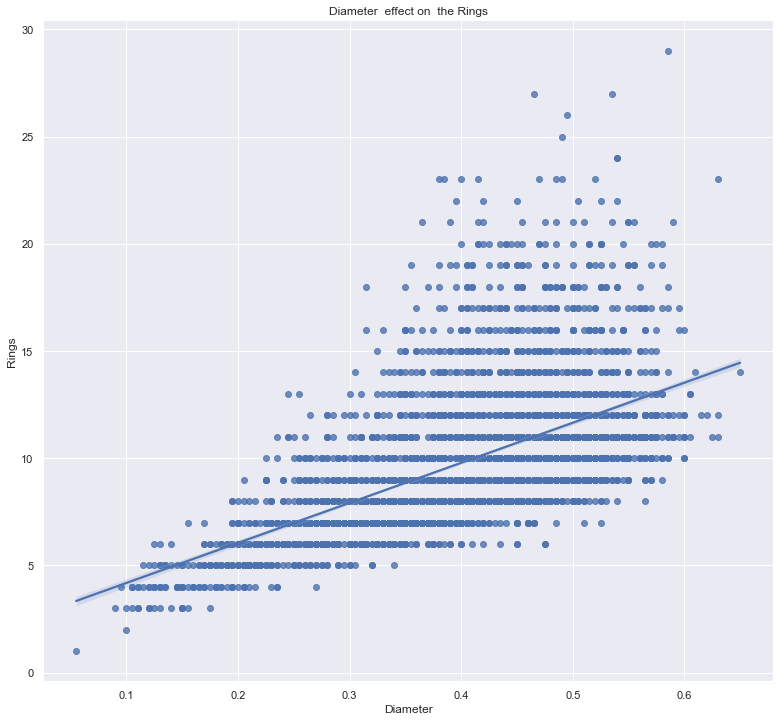

In [13]:

sns.lmplot(data=ablone_data, x ='Diameter', y ='Rings', height =10, aspect =1.1)
plt.title('Diameter  effect on  the Rings')

So  even in the  diameter  also  we  can see  that as  the diameter is being increased  the Rings col values is gradually  being increased 

Text(0.5, 1.0, 'height measurement density ')

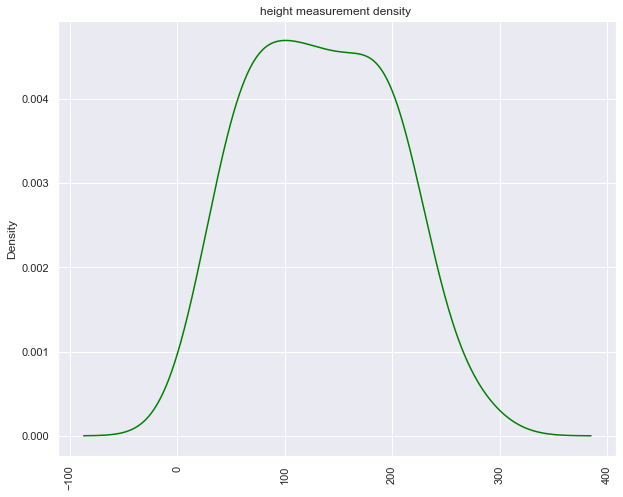

In [14]:
ablone_data.Height.value_counts(ascending = False).head(30).plot(kind = 'kde', color='green')
plt.xticks(rotation = 90);
plt.title('height measurement density ')

Text(0.5, 1.0, 'effect of height on Rings')

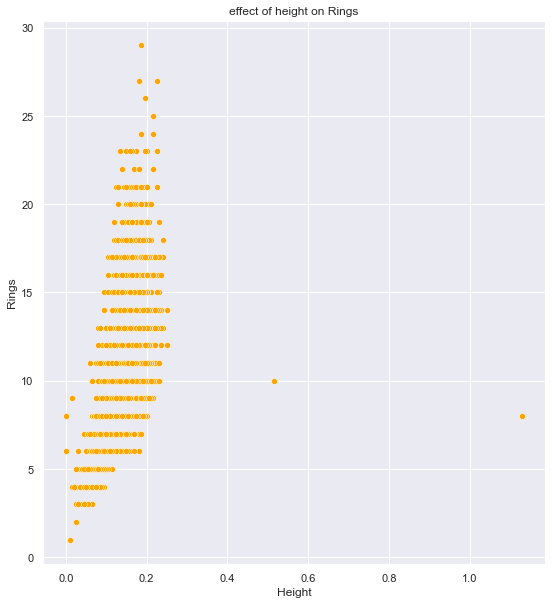

In [15]:
sns.set(rc={"figure.figsize":(9, 10)})
sns.scatterplot(data=ablone_data, x='Height',  y='Rings', color ='orange')
plt.title('effect of height on Rings')

As such  here  we  can see at  the  minimum height  only  the ablone  has  accured  the maxmium Rings  value 

Text(0.5, 1.0, 'Density  of  the weights of  the Ablone')

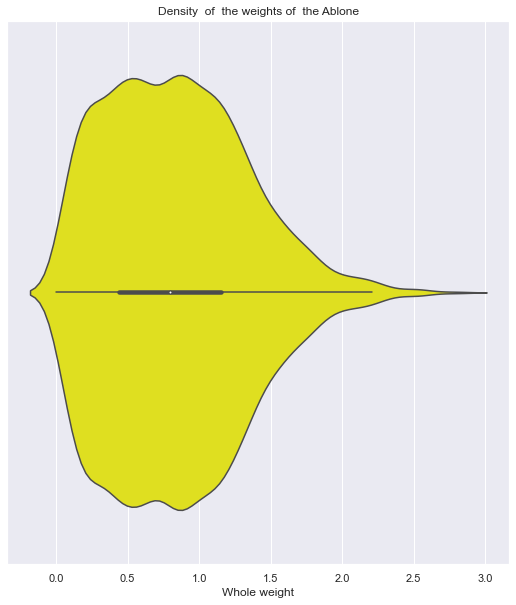

In [16]:
sns.violinplot(data=ablone_data, x ='Whole weight', color ='yellow')
plt.title('Density  of  the weights of  the Ablone')

so from the  graph we  can see  that the ablone has  max density  of weight  between 0.5 to 1.0

Text(0.5, 1.0, 'affect of the inside weight on age ')

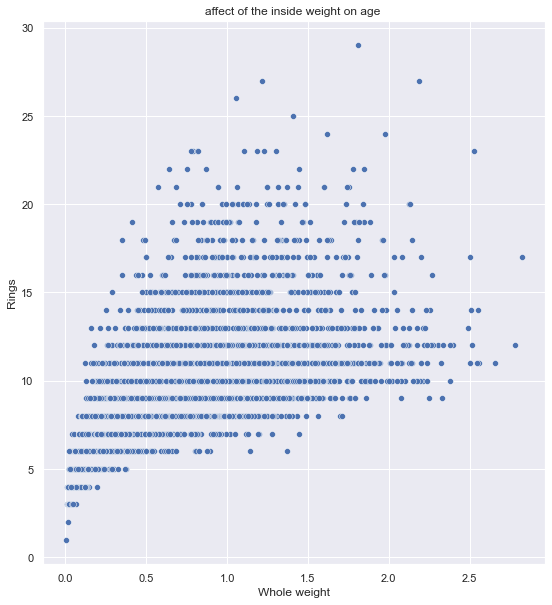

In [17]:
sns.set(rc={"figure.figsize":(9, 10)})
sns.scatterplot(data=ablone_data, x='Whole weight', y ='Rings')
plt.title('affect of the inside weight on age ')

so we  can see here  that as  the inside whole weight is increased  there  is  hight possiblity of getting  higher   ring  value   for  the ablone here

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

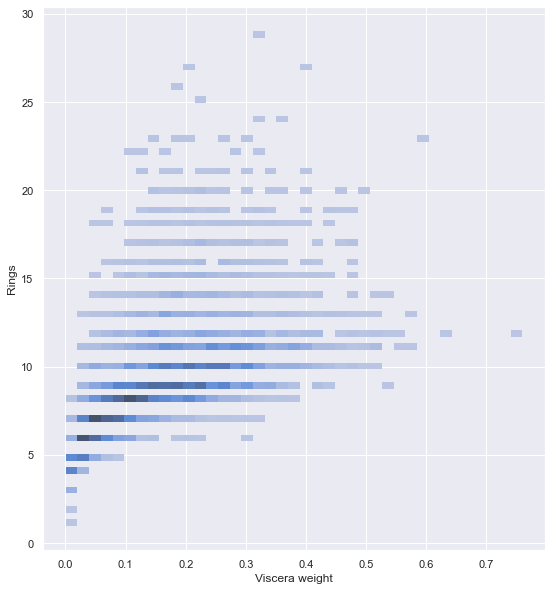

In [18]:
sns.histplot(ablone_data, x ='Viscera weight',y ='Rings')

as we  can see  here that the visecera  weight  is  concentretaed   towards  the  0.0 to 0.5 where  in  0.5 we have max  20 -25 Ring   value  but  above that  we   have  very  rare  Rings value  which is  30

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

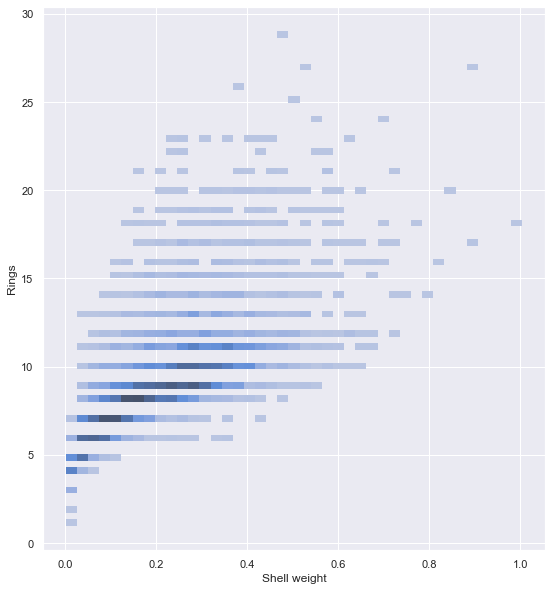

In [19]:
sns.histplot(ablone_data, x ='Shell weight',y ='Rings')

As  here  also we  can see  that the shell weight is being  concentrated  on 
0.0  to 0.6  where  we  have max  of Rings values 0-20 and above this  ring  value  we  have  very less  distribution 

Text(0.5, 1.0, 'comparasion of Length among all the sex categories of abalone')

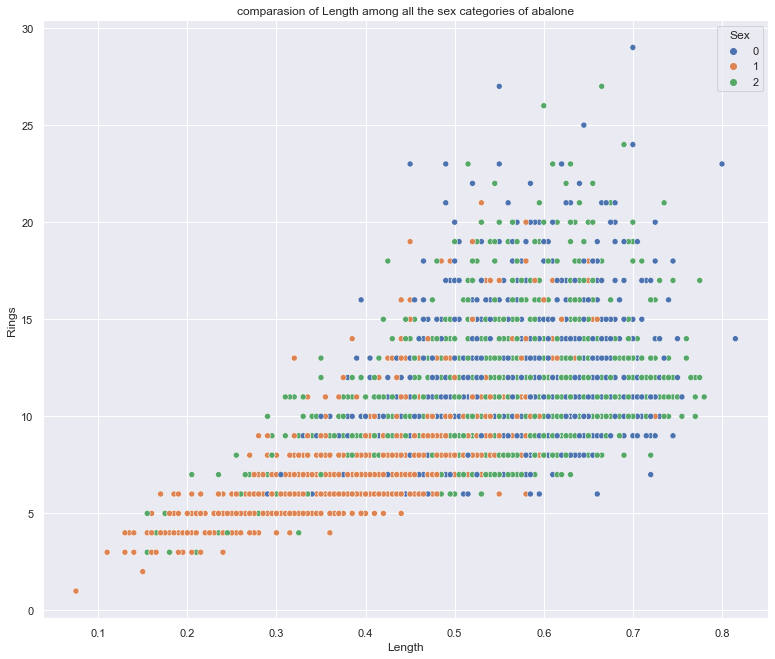

In [20]:
sns.set(rc={"figure.figsize":(13, 11)})
sns.scatterplot(data=ablone_data, x='Length',  y='Rings', hue='Sex', palette='deep')
plt.title('comparasion of Length among all the sex categories of abalone')

So  we  can see  that  the green is  I  and  it  has  content  than  the female  and  male in case  of length 

Text(0.5, 1.0, 'comparasion of height  among all the sex categories of abalone')

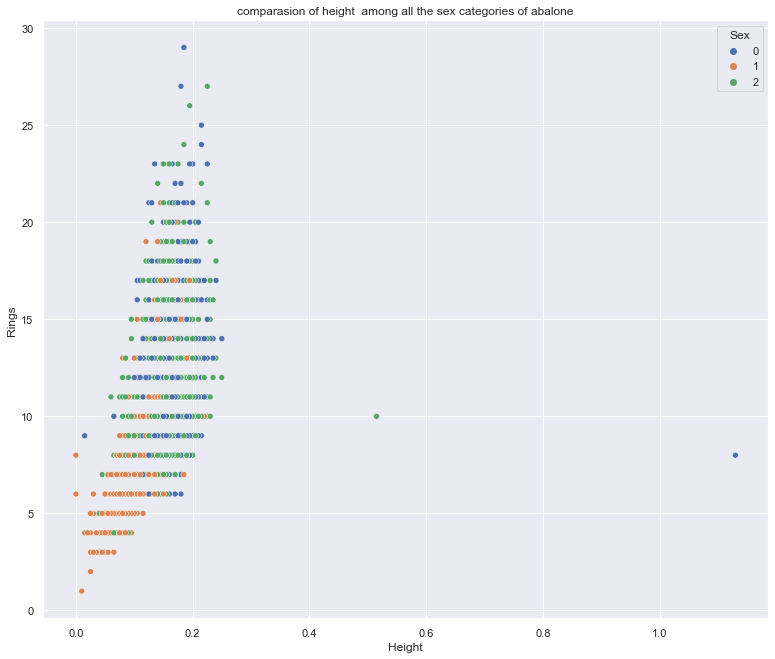

In [21]:
sns.set(rc={"figure.figsize":(13, 11)})
sns.scatterplot(data=ablone_data, x='Height',  y='Rings', hue='Sex', palette='deep')
plt.title('comparasion of height  among all the sex categories of abalone')

Thus we  can see  that  the Height is  max  in the case of Female  than of  male  and I and   even Height and  rings  are  postively correlated 

Text(0.5, 1.0, 'comparasion of Diameter  among all the sex categories of abalone')

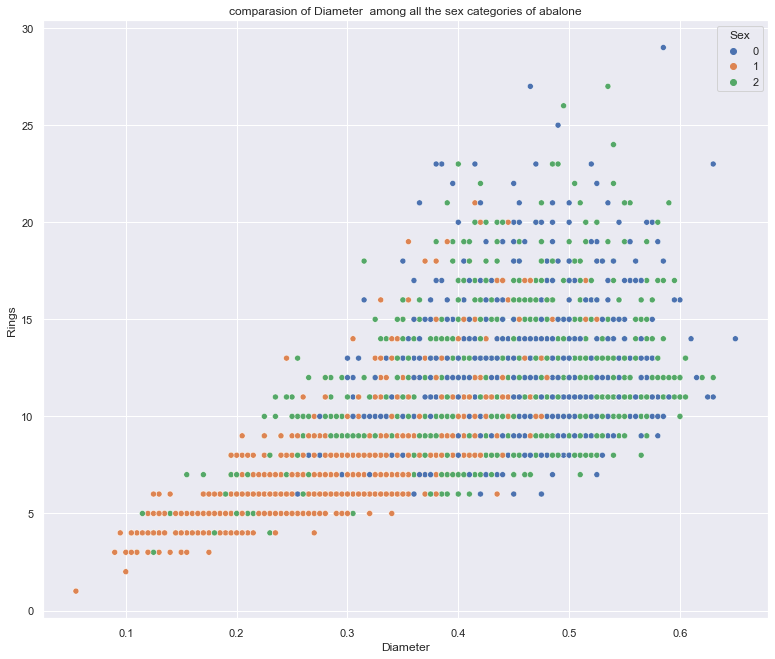

In [22]:
sns.set(rc={"figure.figsize":(13, 11)})
sns.scatterplot(data=ablone_data, x='Diameter',  y='Rings', hue='Sex', palette='deep')
plt.title('comparasion of Diameter  among all the sex categories of abalone')

here also we  can see  that  the  3rd   gender  has  the max of  diameter  than followed  by female  and  the Male

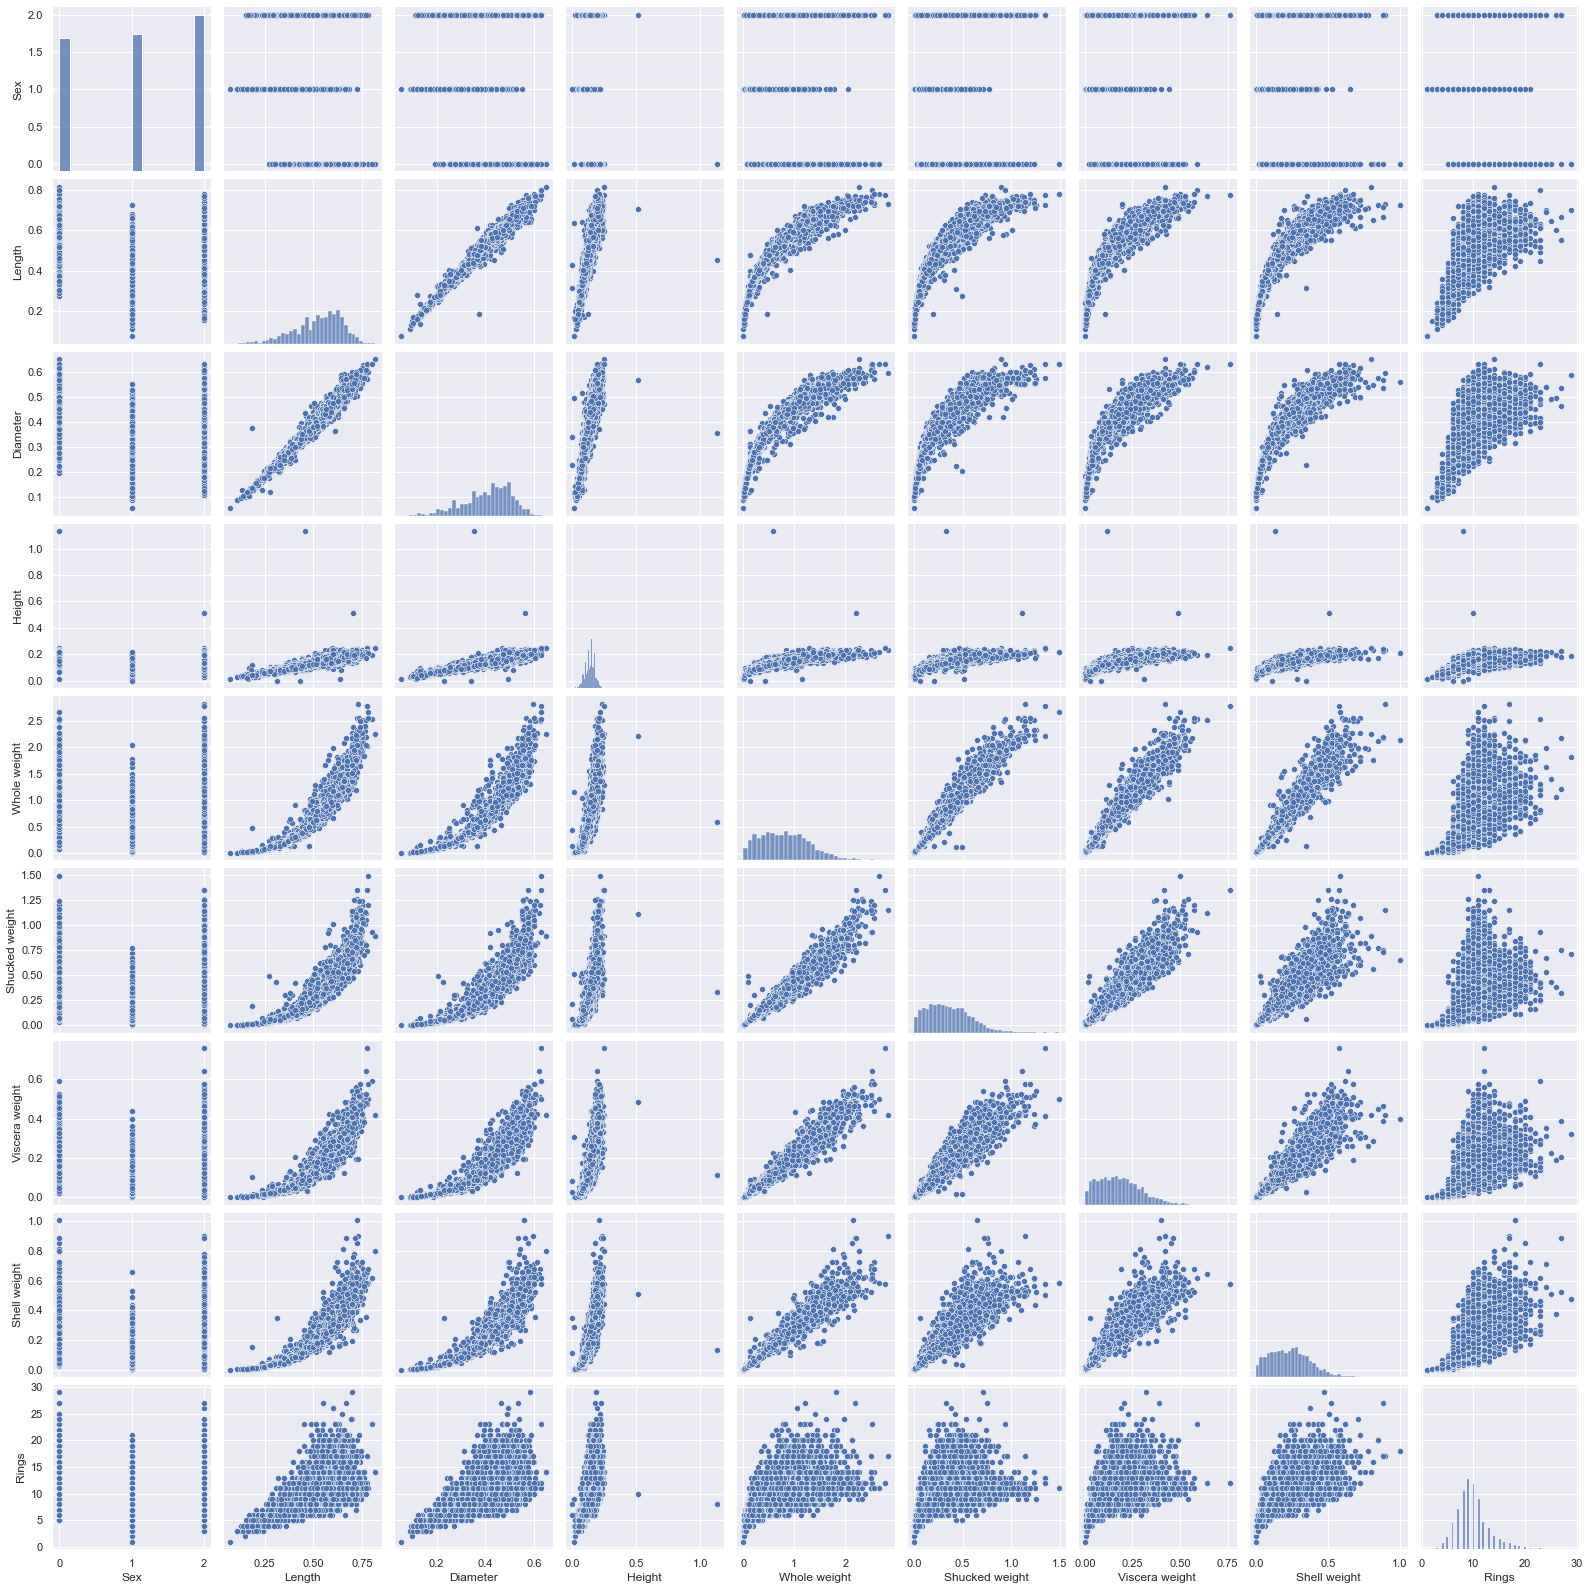

In [23]:
sns.pairplot(ablone_data)

### Correlation analysis 

In [24]:
ablone_data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

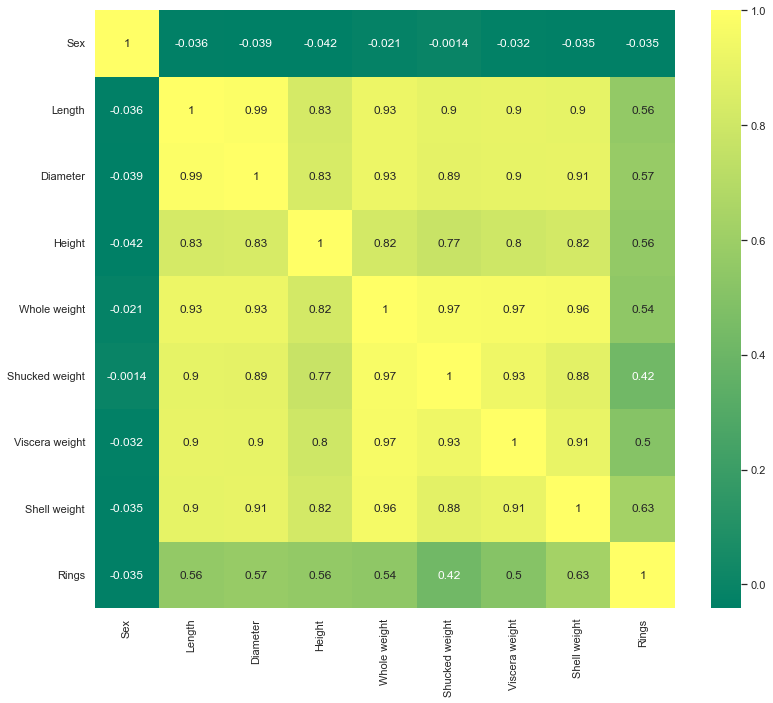

In [25]:
sns.heatmap(ablone_data.corr(), annot =True, cmap='summer')

Checking  the columns  which are +ve & -ve correlated 

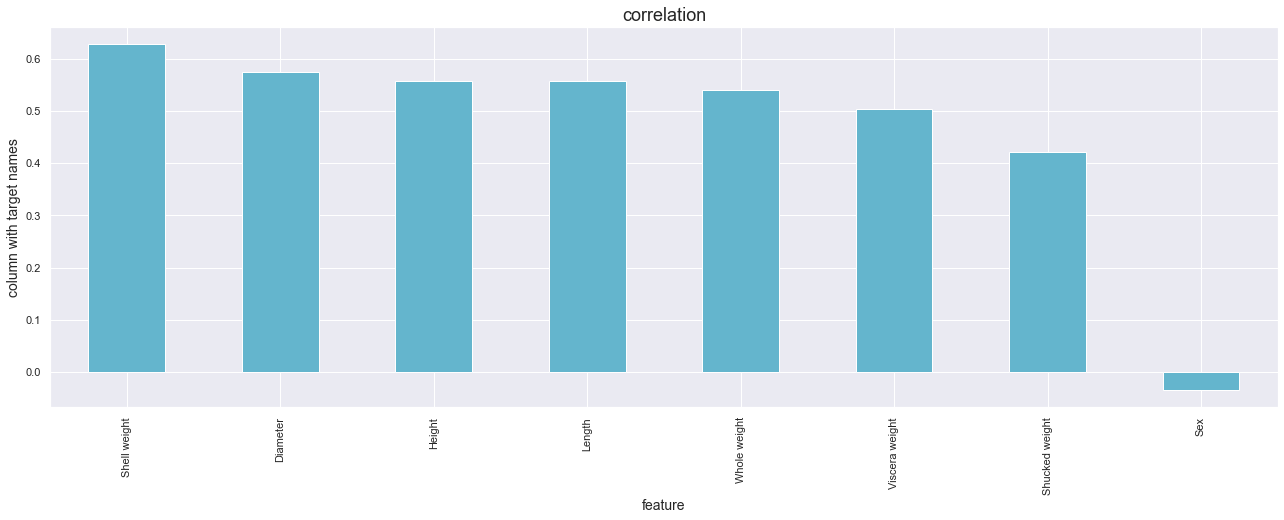

In [26]:
plt.figure(figsize=(22,7))
ablone_data.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Since  we  can see  that all  the  features  are  positive   correlated  leaving  the  sex  column here 

In [27]:
ablone_data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [28]:
ablone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


So now we  have  total  of  5  classses of  output  or  label  data which  can  be  used  further  by  our  classification model  

## Statistical  description of  the dataset

In [29]:
ablone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


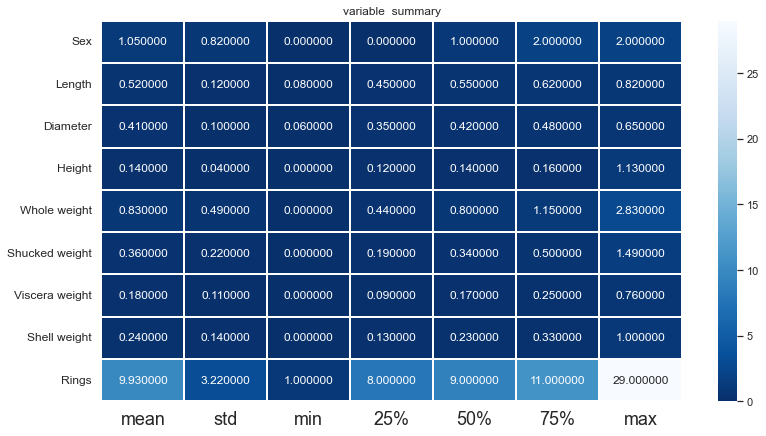

In [30]:
plt.figure(figsize=(13,7))
sns.heatmap(round(ablone_data.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True,cmap='Blues_r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()


Checking   for  the Outliers in the  Dataset using Scipy 

<AxesSubplot:xlabel='Sex'>

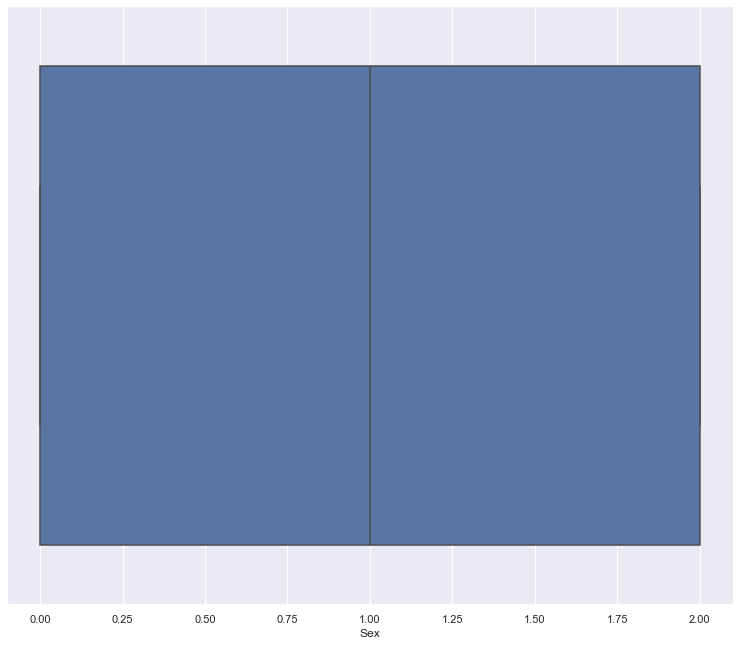

In [31]:
sns.boxplot(ablone_data['Sex'])

<AxesSubplot:xlabel='Length'>

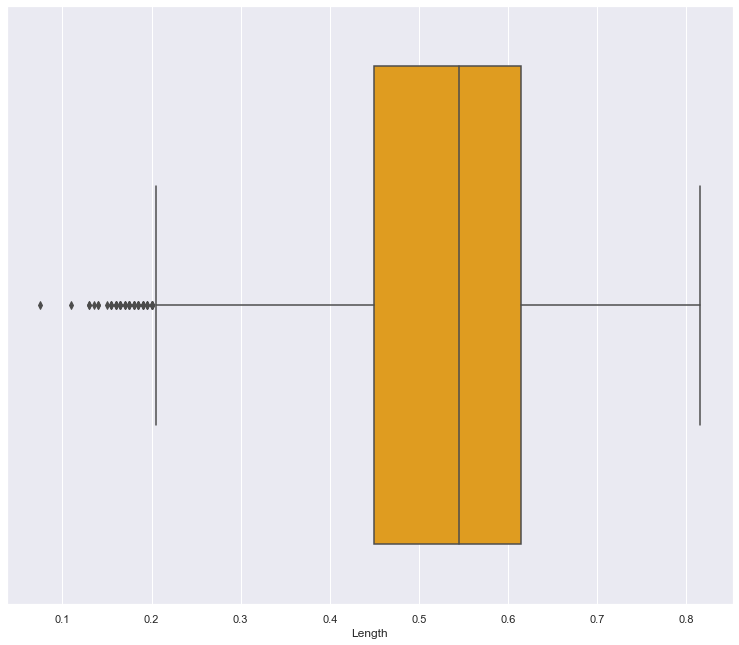

In [32]:
sns.boxplot(ablone_data['Length'], color='orange')

Here  we  can see in the Length  we  have some  outliers  prsent 

<AxesSubplot:xlabel='Diameter'>

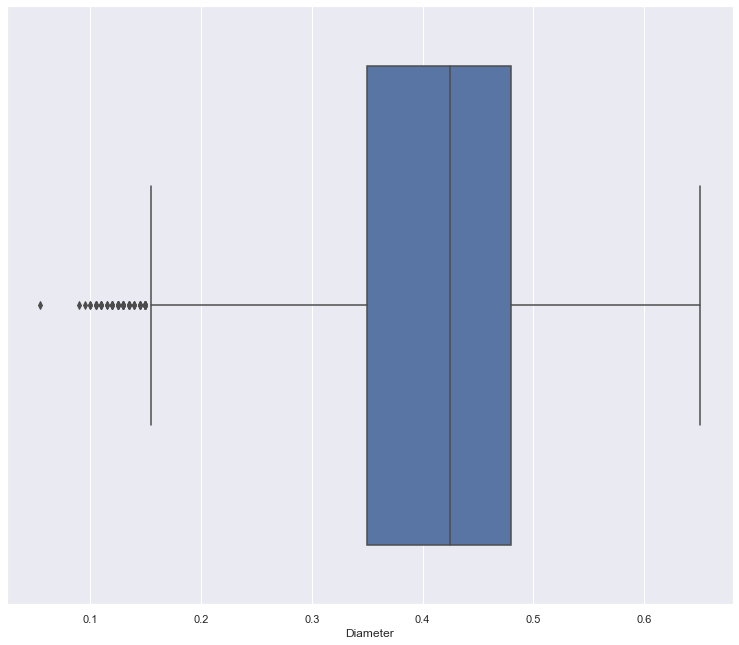

In [33]:
sns.boxplot(ablone_data['Diameter'])

Here in the Diameter  also we  cansee  that we  have some of  the outliers  prsent in it 

<AxesSubplot:xlabel='Whole weight'>

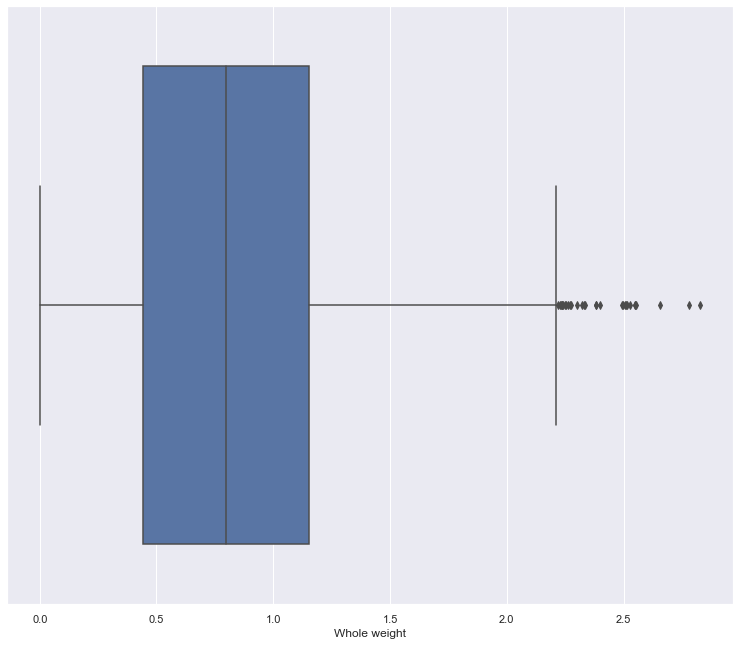

In [34]:
sns.boxplot(ablone_data['Whole weight'])

here also we  can see we  have  few  outliers  prsent 

<AxesSubplot:xlabel='Shucked weight'>

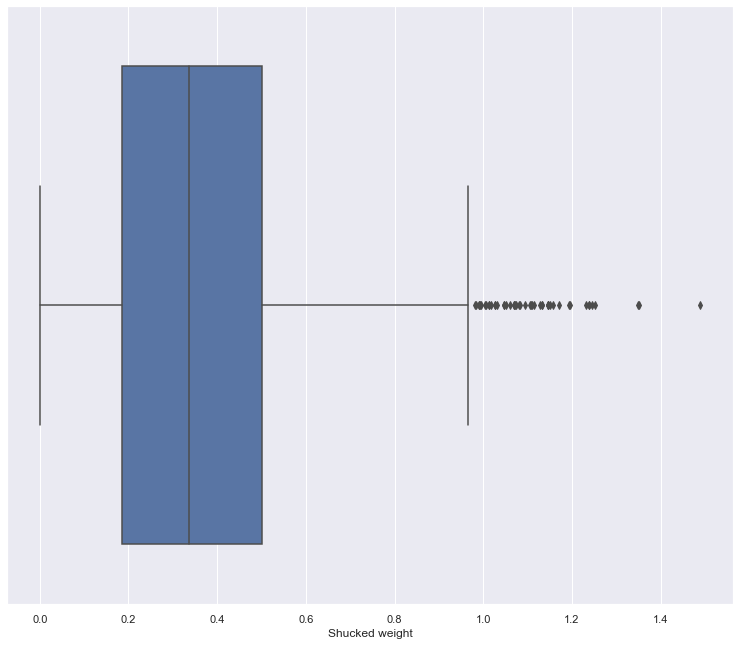

In [35]:
sns.boxplot(ablone_data['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

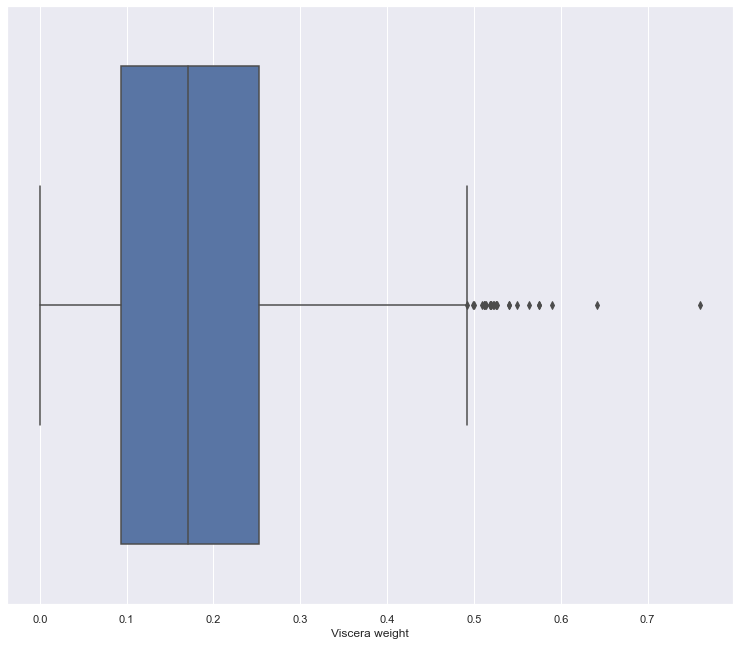

In [36]:
sns.boxplot(ablone_data['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

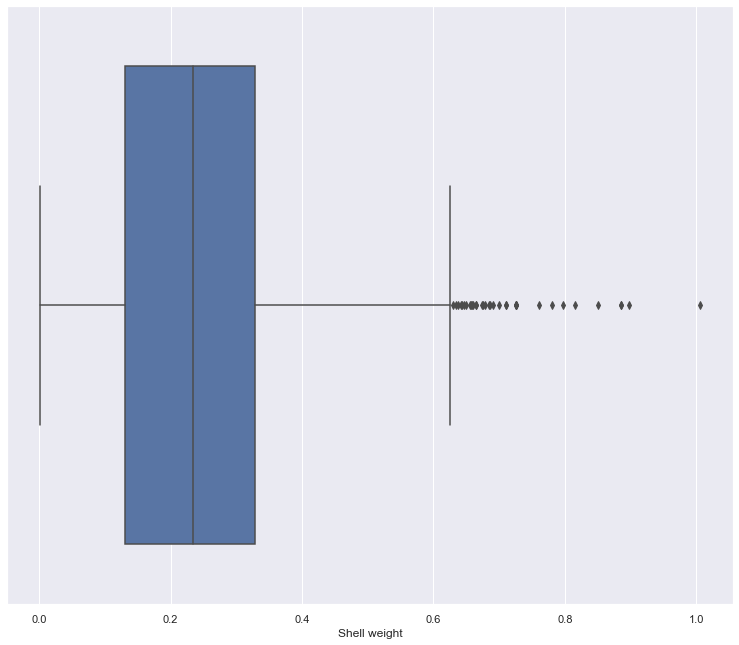

In [37]:
sns.boxplot(ablone_data['Shell weight'])

## **So  here we  can see  that all the  columns  leaving  the sex  col  has  some  more  or less of  outliers present  in  them**

### Checking  for  the  skewness  in the Dataset

In [38]:
abl_df= ablone_data
abl_df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### Graphical represntation of  the skewed  data 

<AxesSubplot:xlabel='Height', ylabel='Density'>

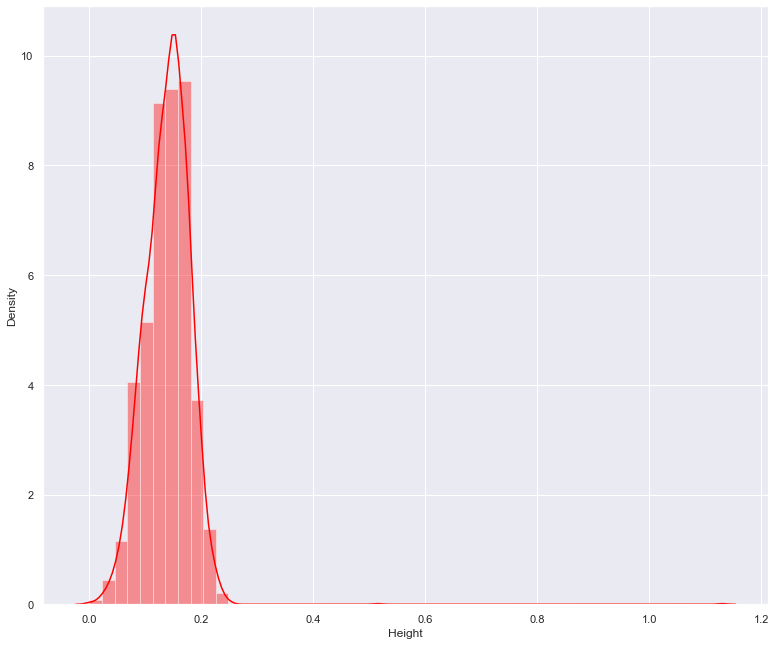

In [39]:
sns.distplot(abl_df['Height'], vertical=False, color='red')

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

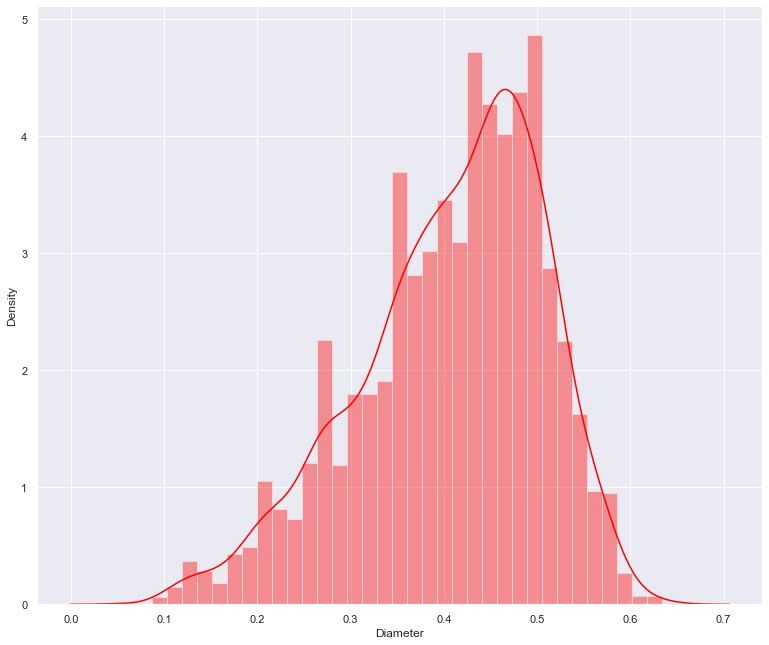

In [40]:
sns.distplot(abl_df['Diameter'], vertical=False, color='red')

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

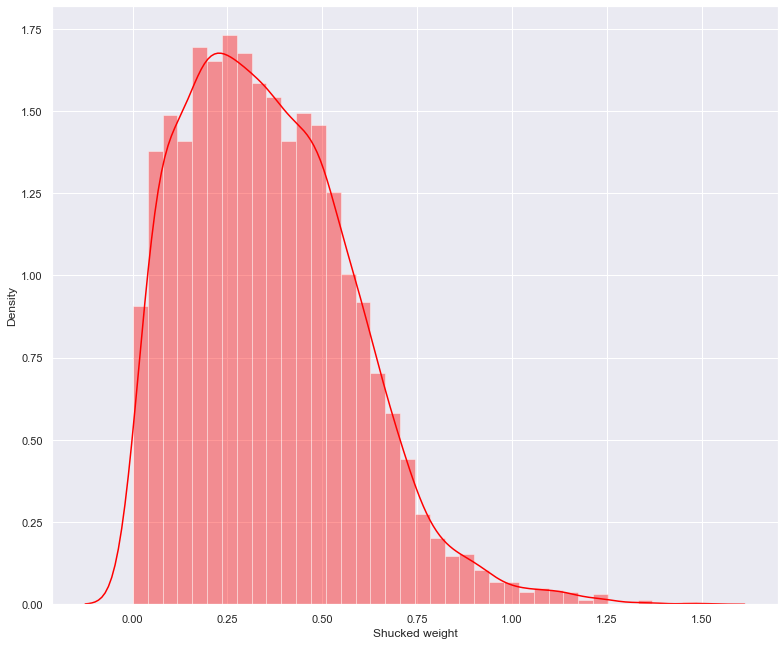

In [41]:
sns.distplot(abl_df['Shucked weight'], vertical=False, color='red')

<AxesSubplot:xlabel='Length', ylabel='Density'>

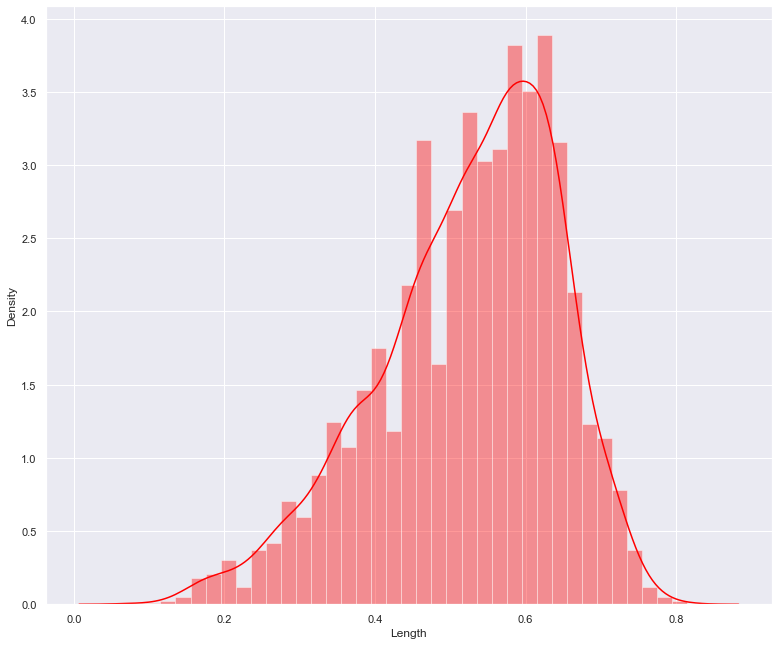

In [42]:
sns.distplot(abl_df['Length'], vertical=False, color='red')

## **Data Cleaning & preprocessing **

#### Removing  the  outliers   from  the  datset

In [44]:
#Removing the skewness
import numpy as np
abl_df["Height"]=np.sqrt(abl_df["Height"])
abl_df["Shucked weight"]=np.sqrt(abl_df["Shucked weight"])

In [45]:
import scipy 
from scipy.stats import zscore
import numpy as np

In [46]:
z= np.abs(zscore(abl_df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.081207,0.641898,0.473703,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.226890,1.230277,1.282430,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.032048,0.309469,0.307012,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.277846,0.637819,0.522695,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.530942,1.272086,1.365513,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.655163,0.118813,0.212901,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.032048,0.279929,0.490146,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.480404,0.708212,0.808489,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.320164,0.541998,0.827809,0.733627,0.410739,0.020571


In [47]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  237,
        238,  238,  238,  239,  239,  270,  275,  277,  278,  294,  306,
        310,  313,  314,  334,  351,  355,  358,  358,  362,  375,  416,
        417,  428,  431,  433,  469,  478,  480,  501,  526,  526,  530,
        572,  628,  673,  674,  675,  678,  694,  694,  696,  696,  718,
        719,  719,  719,  720,  720,  720,  744,  754,  756,  811,  891,
        891, 1048, 1051, 1052, 1174, 1204, 1206, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429, 1429, 1528,
       1757, 1759, 1762, 1762, 1763, 1763, 1763, 1986, 1987, 1987, 1987,
       2051, 2090, 2108, 2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171,
       2172, 2176, 2180, 2199, 2201, 2208, 2209, 2274, 2275, 2305, 2334,
       2334, 2334, 2335, 2344, 2358, 2368, 2381, 2381, 2436, 2459, 2471,
       2623, 2624, 2624, 2709, 2710, 2711, 2810, 2

In [48]:
abl_new= abl_df[(z<3).all(axis=1)]

In [49]:
abl_new.shape

(4037, 9)

### Percentage  of Loss

In [50]:
loss_percentage = (4177-4037)/4177*100
print(loss_percentage,'%')

3.3516878142207327 %


In [51]:
x=abl_new.drop(['Rings'],axis=1)
y = abl_new.iloc[:,-1]  #  splitting the  data  into x and  y 

In [52]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.473814,0.1010,0.150
1,2,0.350,0.265,0.300000,0.2255,0.315436,0.0485,0.070
2,0,0.530,0.420,0.367423,0.6770,0.506458,0.1415,0.210
3,2,0.440,0.365,0.353553,0.5160,0.464220,0.1140,0.155
4,1,0.330,0.255,0.282843,0.2050,0.299166,0.0395,0.055


In [53]:

y.head

<bound method NDFrame.head of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4037, dtype: int64>

## Plotting  the Normal distribution graphs after  skewness removal

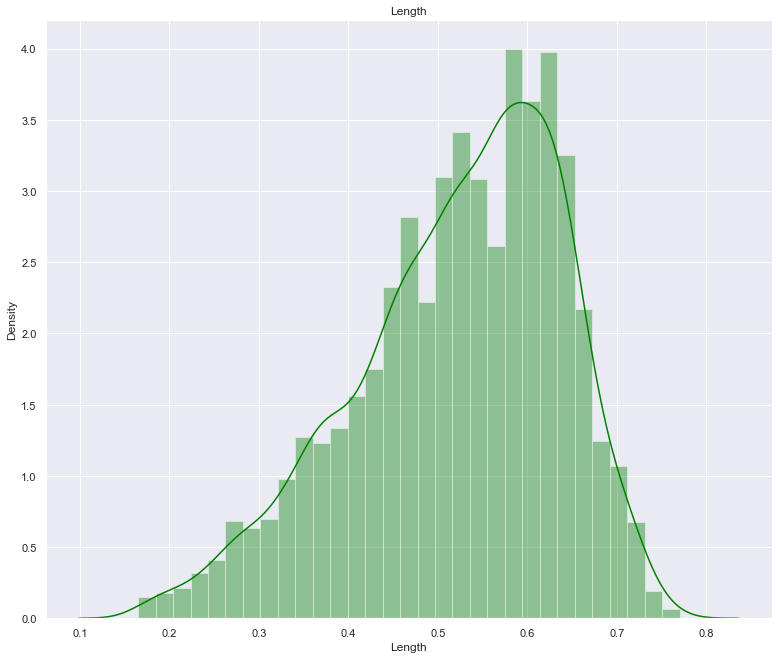

In [54]:
sns.distplot(x['Length'], color='green')
plt.title("Length")
plt.show()

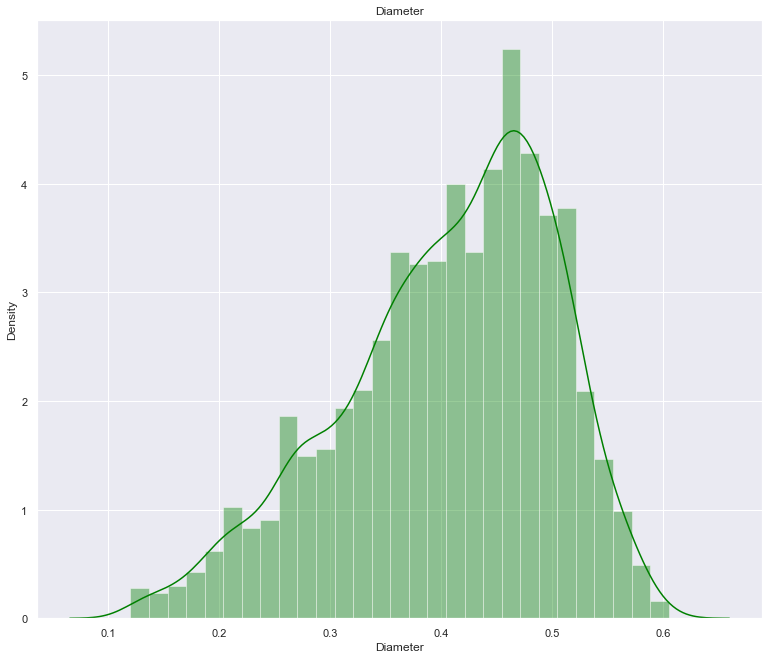

In [55]:
sns.distplot(x['Diameter'], color='green')
plt.title("Diameter")
plt.show()

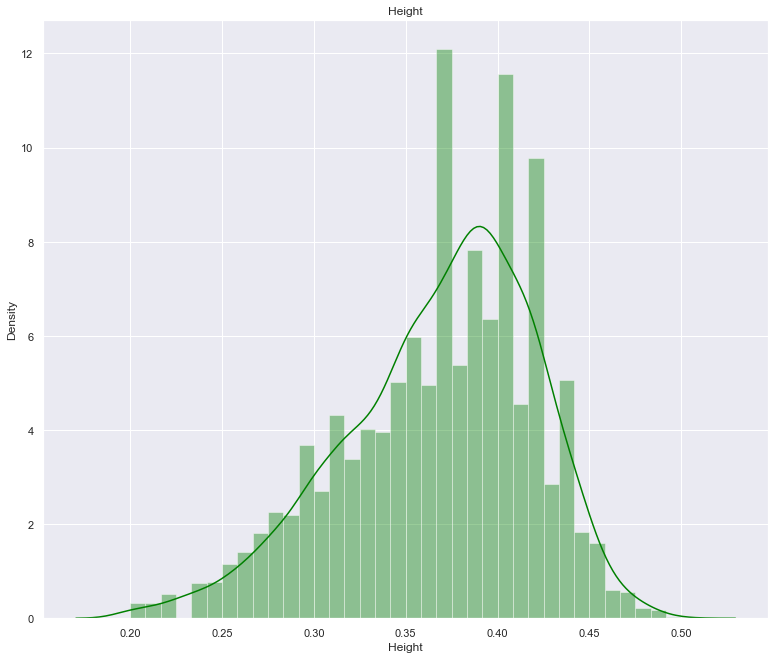

In [56]:
sns.distplot(x['Height'], color='green')
plt.title("Height")
plt.show()

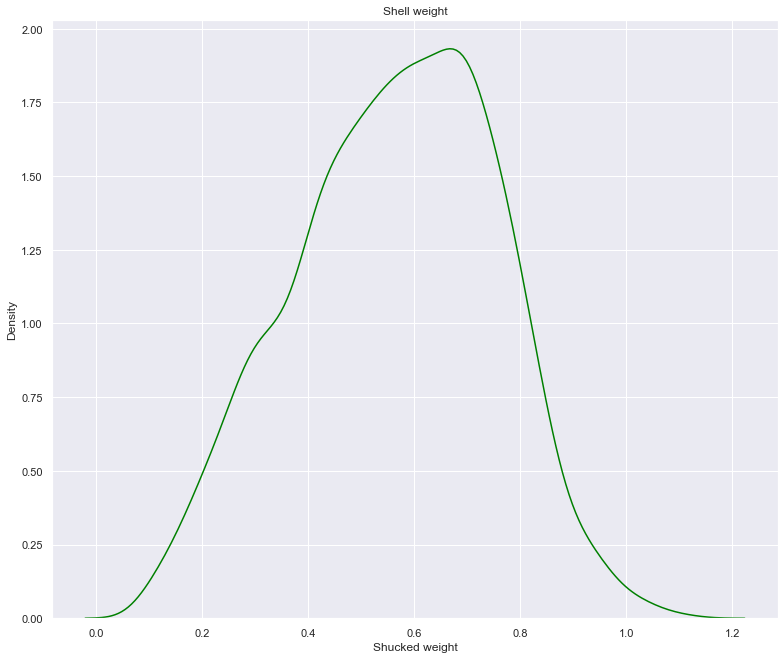

In [57]:
sns.kdeplot(x['Shucked weight'], color='green')
plt.title("Shell weight")
plt.show()

## Creating our model

In [58]:
# importing some base  models here,since  we  are using  Regressor  as  the label has  continous or numerical values 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

###  splitting into train and  test data 

In [59]:
lr= LinearRegression()

In [60]:
#Choosing the best random state for our ML Model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"Best training accuracy is :{r2_score(y_train,pred_train)}, at random state : {i}")
print(f"Best test accuracy is :{r2_score(y_test,pred_test)}, at random state : {i}")


Best training accuracy is :0.47560040642249957, at random state : 99
Best test accuracy is :0.5029766882528317, at random state : 99


In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=99, test_size=0.3)

## using Linear  regression model

In [62]:
#taking Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression : ",r2_score(y_test,pred_test))

Accuracy score of Linear Regression :  0.5029766882528317


### Doing the Cross validation on the Linear Regression model

In [63]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=6)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Linear Regressor model: ",cv_mean1)

Cross Validation Score for Linear Regressor model:  0.3948511885600367


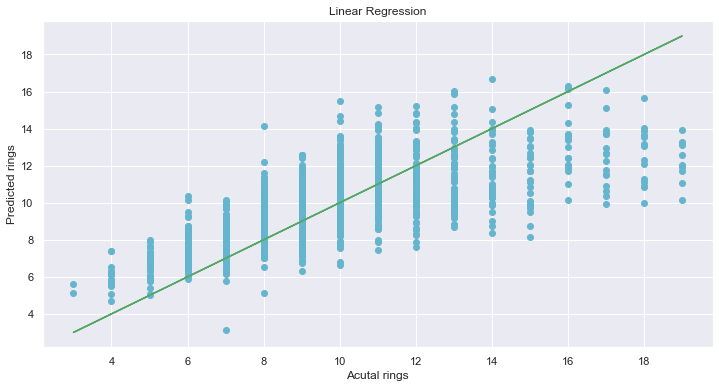

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test,color='c')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Linear Regression")
plt.show()

Thus cv  results  are  not  so good 

## Random Forest Model

In [91]:
#Taking the randomforest regressor model
rfr=RandomForestRegressor(n_estimators =200, random_state=98,bootstrap=True,)
rfr.fit(x_train,y_train)
pred_test_rf=rfr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.5556353478703016


In [66]:
#Checking the cross validation of randomforest regressor to avaoid over fiiting 

cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Random Forest Regressor model: ",cv_mean3)

Cross Validation Score for Random Forest Regressor model:  0.4626656490649113


the CV  results of randomforestregressor was alo not so good

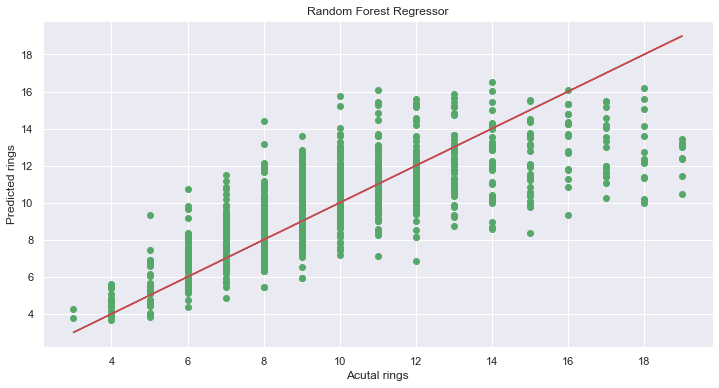

In [92]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_rf,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Random Forest Regressor")
plt.show()


As  here  we  can see  that, Random forest  is predicting  better  than the Linear  regression ⛑ as the the r2 score  here  is little  higher which is 54 %

### Using  the GradientBoosting  Algorithm

In [88]:
#Taking the randomforest regressor model
Gbr =GradientBoostingRegressor(n_estimators =1000,learning_rate =0.1 ,random_state=110, max_depth=4, alpha=0.1,n_iter_no_change=5 )
Gbr.fit(x_train,y_train)
pred_test_Gbr=Gbr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.5556353478703016


In [74]:
#Checking the cross validation of Gradient boosting regressor to avaoid over fiiting 

cv_score=cross_val_score(Gbr,x,y,cv=7)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Gradient boosting Regressor model: ",cv_mean3)

Cross Validation Score for Gradient boosting Regressor model:  0.4813225478086931


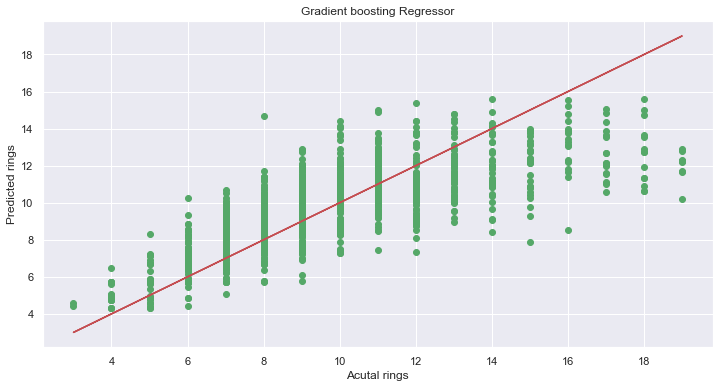

In [89]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_Gbr,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Gradient boosting Regressor")
plt.show()

Gradient boosting algorithm  gave  the  best  results among  the  three which  is  55%  which  is  1% increased  than random
forest

### Using Hypertuning  to Gradient Boosting
  
  using the GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
# defining  all the  parameters 
n_estimators =[int(x) for x in np.linspace(start=10,stop =300, num=10)]
max_features=['auto','sqrt', 'log2']
learning_rate=[0.1,0.01,0.001,0.001,1]
random_state=[30,90,100,200,500]
max_depth=[2,6]
min_samples_split=[2,5]

In [82]:
# now  creating  a param grid here
random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
            'learning_rate':learning_rate,
            'random_state':random_state,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split}
             '
             
print(random_grid)


IndentationError: unexpected indent (Temp/ipykernel_18276/1900925384.py, line 8)

In [ ]:
rf_Grid = GridSearchCV(estimator=rfr, param_grid=random_grid, cv=8,verbose =4, n_jobs=4)

In [ ]:
rf_Grid.fit(x_train, y_train)

In [84]:
from sklearn.linear_model import Ridge,Lasso, ElasticNet

In [85]:
# using some  of  the regularization techniques  here 
mor= Ridge(alpha=0.01)
mor.fit(x_train, y_train)
mor_pred= mor.predict(x_test)
print("A score from Ridge regularization is  : ",r2_score(y_test,mor_pred))

A score from Ridge regularization is  :  0.503081991749037


In [86]:
lasr = Lasso(alpha=0.01)
lasr.fit(x_train, y_train)
lasr_pred =lasr.predict(x_test)
print("A score  from Lasso regularization:", r2_score(y_test, lasr_pred))

A score  from Lasso regularization: 0.46357914415775636


In [87]:
elsr = ElasticNet(alpha=0.01)
elsr.fit(x_train, y_train)
elsr_pred = elsr.predict(x_test)
print("A score from ElasticNet regularization is", r2_score(y_test, elsr_pred))

A score from ElasticNet regularization is 0.3850903476706753


so  here  we can see clearly  that  the Gradient  boosting is  working  great among  all  the models  with 55% accuracy
better  than even ridge and lasso models

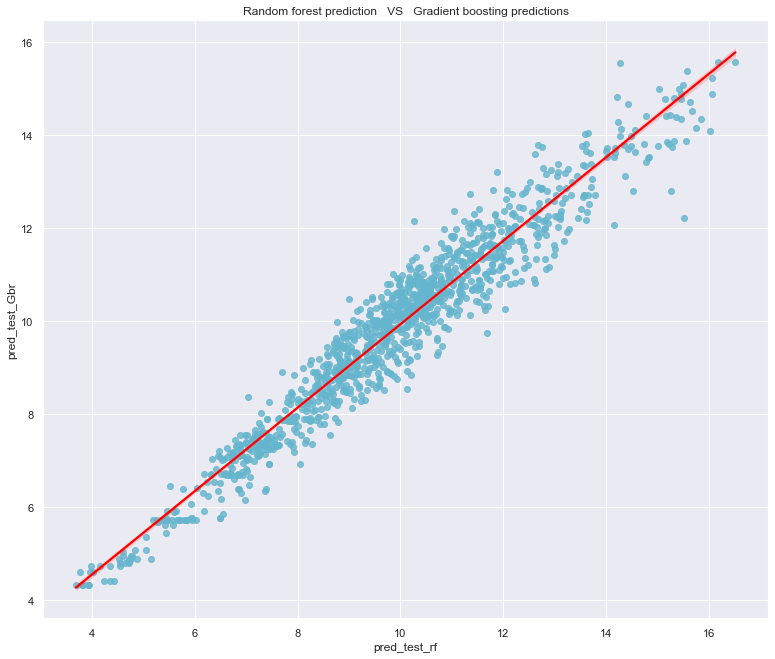

In [145]:
plt.title("Random forest prediction   VS   Gradient boosting predictions")
plt.xlabel("pred_test_rf")
plt.ylabel("pred_test_Gbr")
sns.regplot(pred_test_rf, pred_test_Gbr , scatter=True, scatter_kws={'color':'c'}, line_kws={'color':'red'})
plt.show()

##### as  we know that  the  performance  of  both  the  algos  are almost  same they  make  a fit their  predictions on sameline

### Saving The Final model

In [146]:
# so as  both where  giving almost  the same  result  thus we can go  with anyone 
import pickle
filename = 'ablone_age_data'
pickle.dump(Gbr, open(filename, 'wb'))

### Conclusion and the  prediction by  the model

In [147]:
a = np.array(y_test)
predicted = np.array(Gbr.predict(x_test))
df_ablone = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_ablone

,orginal,predicted
0,7,7.505005
1,9,9.568573
2,9,9.985988
3,8,10.194132
4,11,10.901263
...,...,...
1207,8,6.359503
1208,11,11.754510
1209,13,10.866234
1210,12,8.892409


In [148]:
df = df_ablone.to_csv('ablone_prediction.csv')

### so here  we are  done with our  predictive working model